# Import Necessities

In [ ]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering & Prepocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Training
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
#xgboost, svm

In [ ]:
train_x_df = pd.read_csv("https://raw.githubusercontent.com/RifaiKN/competition/main/findit2024/train_features.csv")
train_y_df = pd.read_csv("https://raw.githubusercontent.com/RifaiKN/competition/main/findit2024/train_labels.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/RifaiKN/competition/main/findit2024/test_features.csv")
submission_df = pd.read_csv("https://raw.githubusercontent.com/RifaiKN/competition/main/findit2024/submission_format.csv")

In [ ]:
train_df = pd.concat([train_x_df, train_y_df], axis=1)

In [ ]:
train_df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


# Data Exploratory Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [ ]:
cat_cols = ['pendidikan', 'status_pernikahan']
bin_cols = ['keluhan']
num_cols = ['tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita',
            'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah',
            'belanja_daging', 'belanja_ikan', 'belanja_kue',
            'pembelian_diskon', 'pembelian_web', 'pembelian_toko']
target_col = ['jumlah_promosi']

## Missval

In [ ]:
print("\n--- Check Count of NA ---")
print(train_df.isna().sum())


--- Check Count of NA ---
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64


<Axes: >

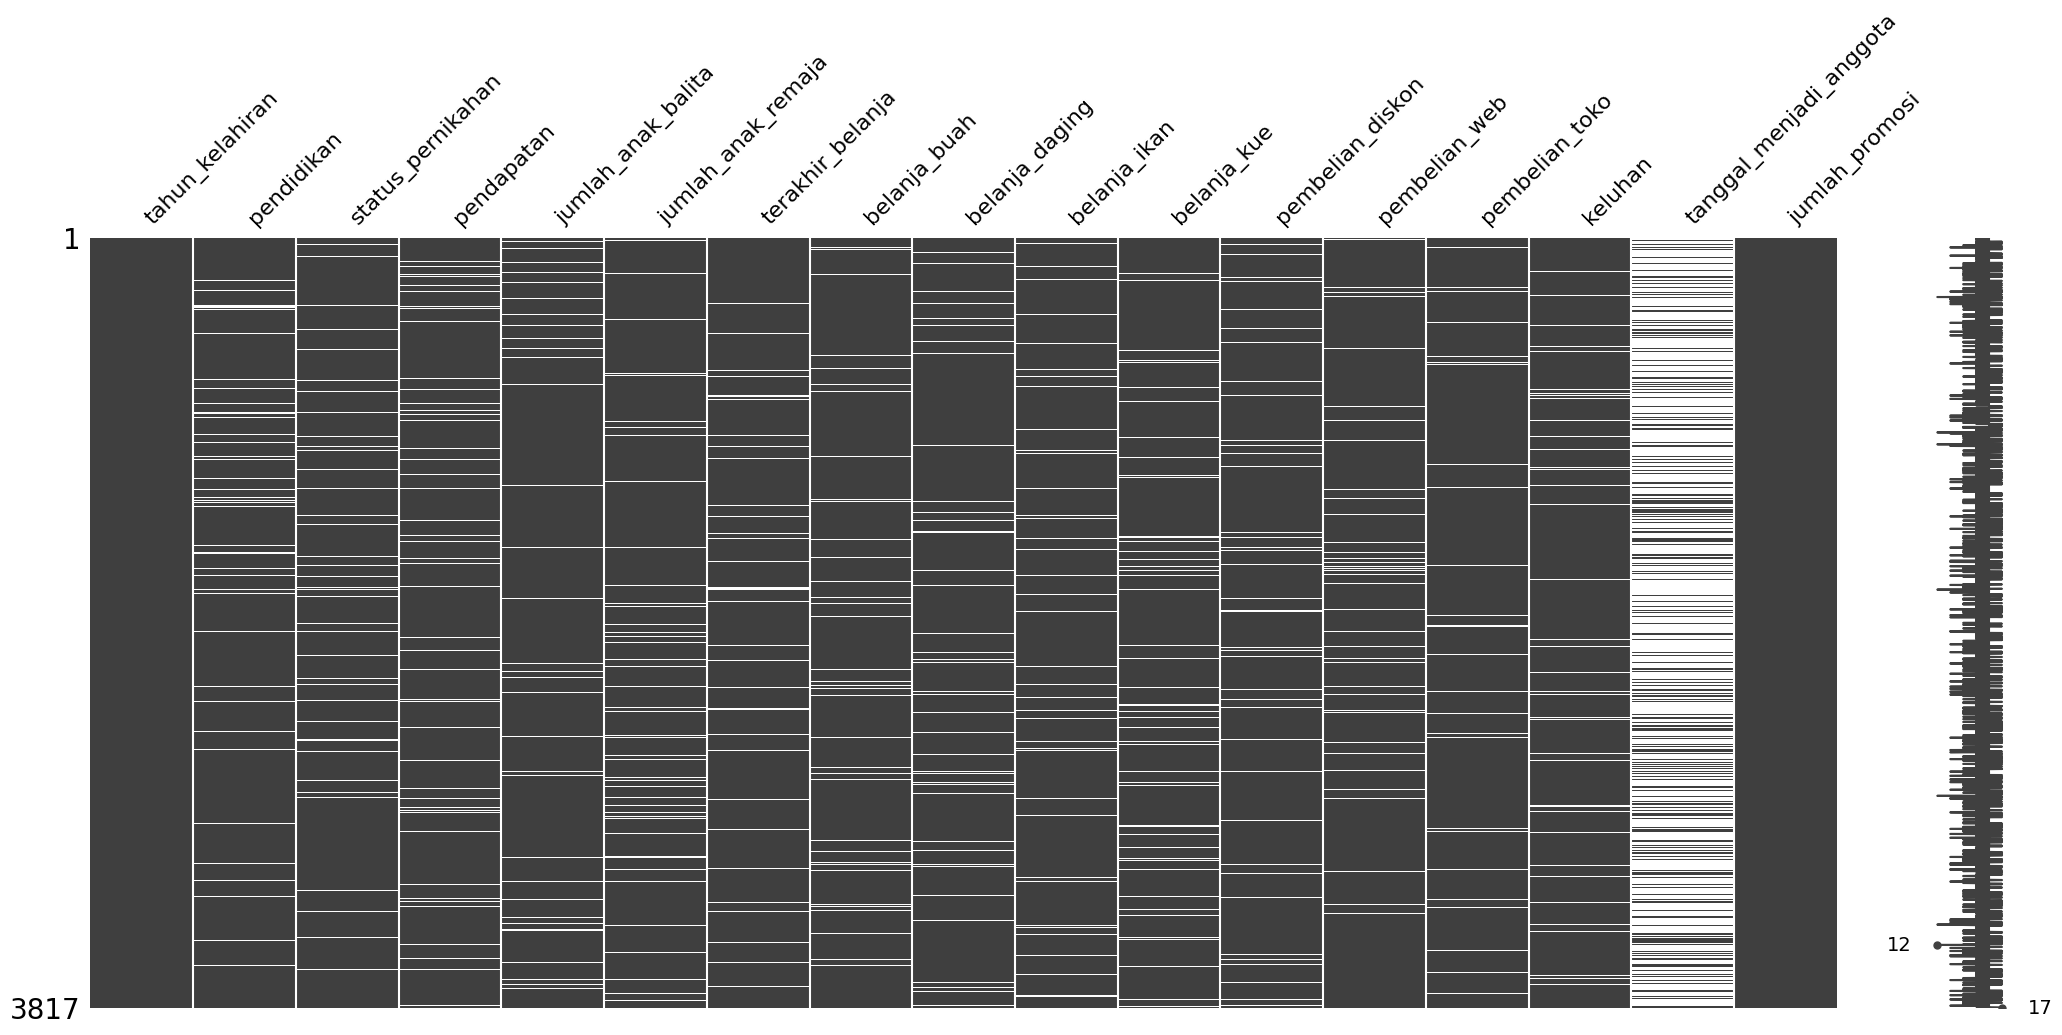

In [ ]:
msno.matrix(train_df)

keknya tanggal ni jelek bgt, drop aja

In [ ]:
print("--- Check Unique Values on the columns (checking cat/num) ---")
train_df.nunique()

--- Check Unique Values on the columns (checking cat/num) ---


tahun_kelahiran              76
pendidikan                    6
status_pernikahan             6
pendapatan                 3622
jumlah_anak_balita            3
jumlah_anak_remaja            3
terakhir_belanja            113
belanja_buah               2535
belanja_daging             2951
belanja_ikan               2627
belanja_kue                2475
pembelian_diskon             18
pembelian_web                18
pembelian_toko               18
keluhan                       2
tanggal_menjadi_anggota     564
jumlah_promosi                7
dtype: int64

In [ ]:
print("--- Checking  duplicates ---")
train_df.duplicated().sum()

--- Checking  duplicates ---


0

In [ ]:
train_df.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
count,3817.000000,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000,3621.000000,3817.000000
mean,1967.823946,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971,2.585800
std,11.768131,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738,0.070340,2.101845
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,1968.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000,3.000000
75%,1976.000000,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000,0.000000,4.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000,6.000000


In [ ]:
# The non-numerical data
train_df.describe(include=['O'])

,pendidikan,status_pernikahan,tanggal_menjadi_anggota
count,3628,3605,1065
unique,6,6,564
top,Sarjana,Rencana Menikah,2013-05-17
freq,1841,1271,6


## Understanding Cat Columns

In [ ]:
cat_cols

['pendidikan', 'status_pernikahan']

In [ ]:
for i in cat_cols:
  print(train_df[i].value_counts(), "\n")

pendidikan
Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: count, dtype: int64 

status_pernikahan
Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: count, dtype: int64 



In [ ]:
nilai_mayoritas_pen_1 = train_df['pendidikan'].mode()[0]
nilai_mayoritas_pen_2 = train_df['pendidikan'].mode()[0]

train_df['pendidikan'] = train_df['pendidikan'].replace('5', nilai_mayoritas_pen_1)
test_df['pendidikan'] = test_df['pendidikan'].replace('5', nilai_mayoritas_pen_2)
# train_df = train_df[train_df['pendidikan'] != '5']
# test_df = test_df[test_df['pendidikan'] != '5']

In [ ]:
nilai_mayoritas_pen_1 = train_df['status_pernikahan'].mode()[0]
nilai_mayoritas_pen_2 = train_df['status_pernikahan'].mode()[0]

train_df['status_pernikahan'] = train_df['status_pernikahan'].replace('5', nilai_mayoritas_pen_1)
test_df['status_pernikahan'] = test_df['status_pernikahan'].replace('5', nilai_mayoritas_pen_2)

# train_df = train_df[train_df['status_pernikahan'] != '5']
# test_df = test_df[test_df['status_pernikahan'] != '5']

In [ ]:
for i in cat_cols:
  print(train_df[i].value_counts(), "\n")

pendidikan
Sarjana     1843
Magister     856
SMA          435
Doktor       403
SMP           91
Name: count, dtype: int64 

status_pernikahan
Rencana Menikah    1272
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
Name: count, dtype: int64 



ada unique val "5"

## Understanding Bin Columns

In [ ]:
bin_cols

['keluhan']

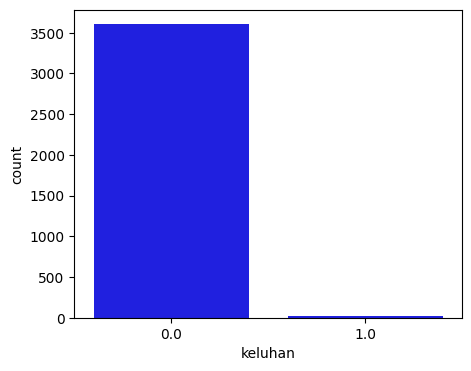

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x=train_df["keluhan"], color="blue")
plt.show()

bagus nih, jarang ada keluhan



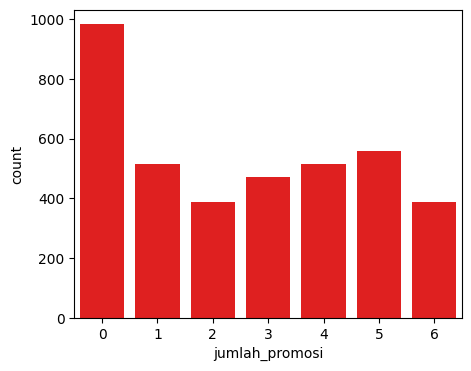

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x=train_df["jumlah_promosi"], color="red")
plt.show()

agak merata, tapi dikit imbalance di "0"

## Understanding Numeric Columns

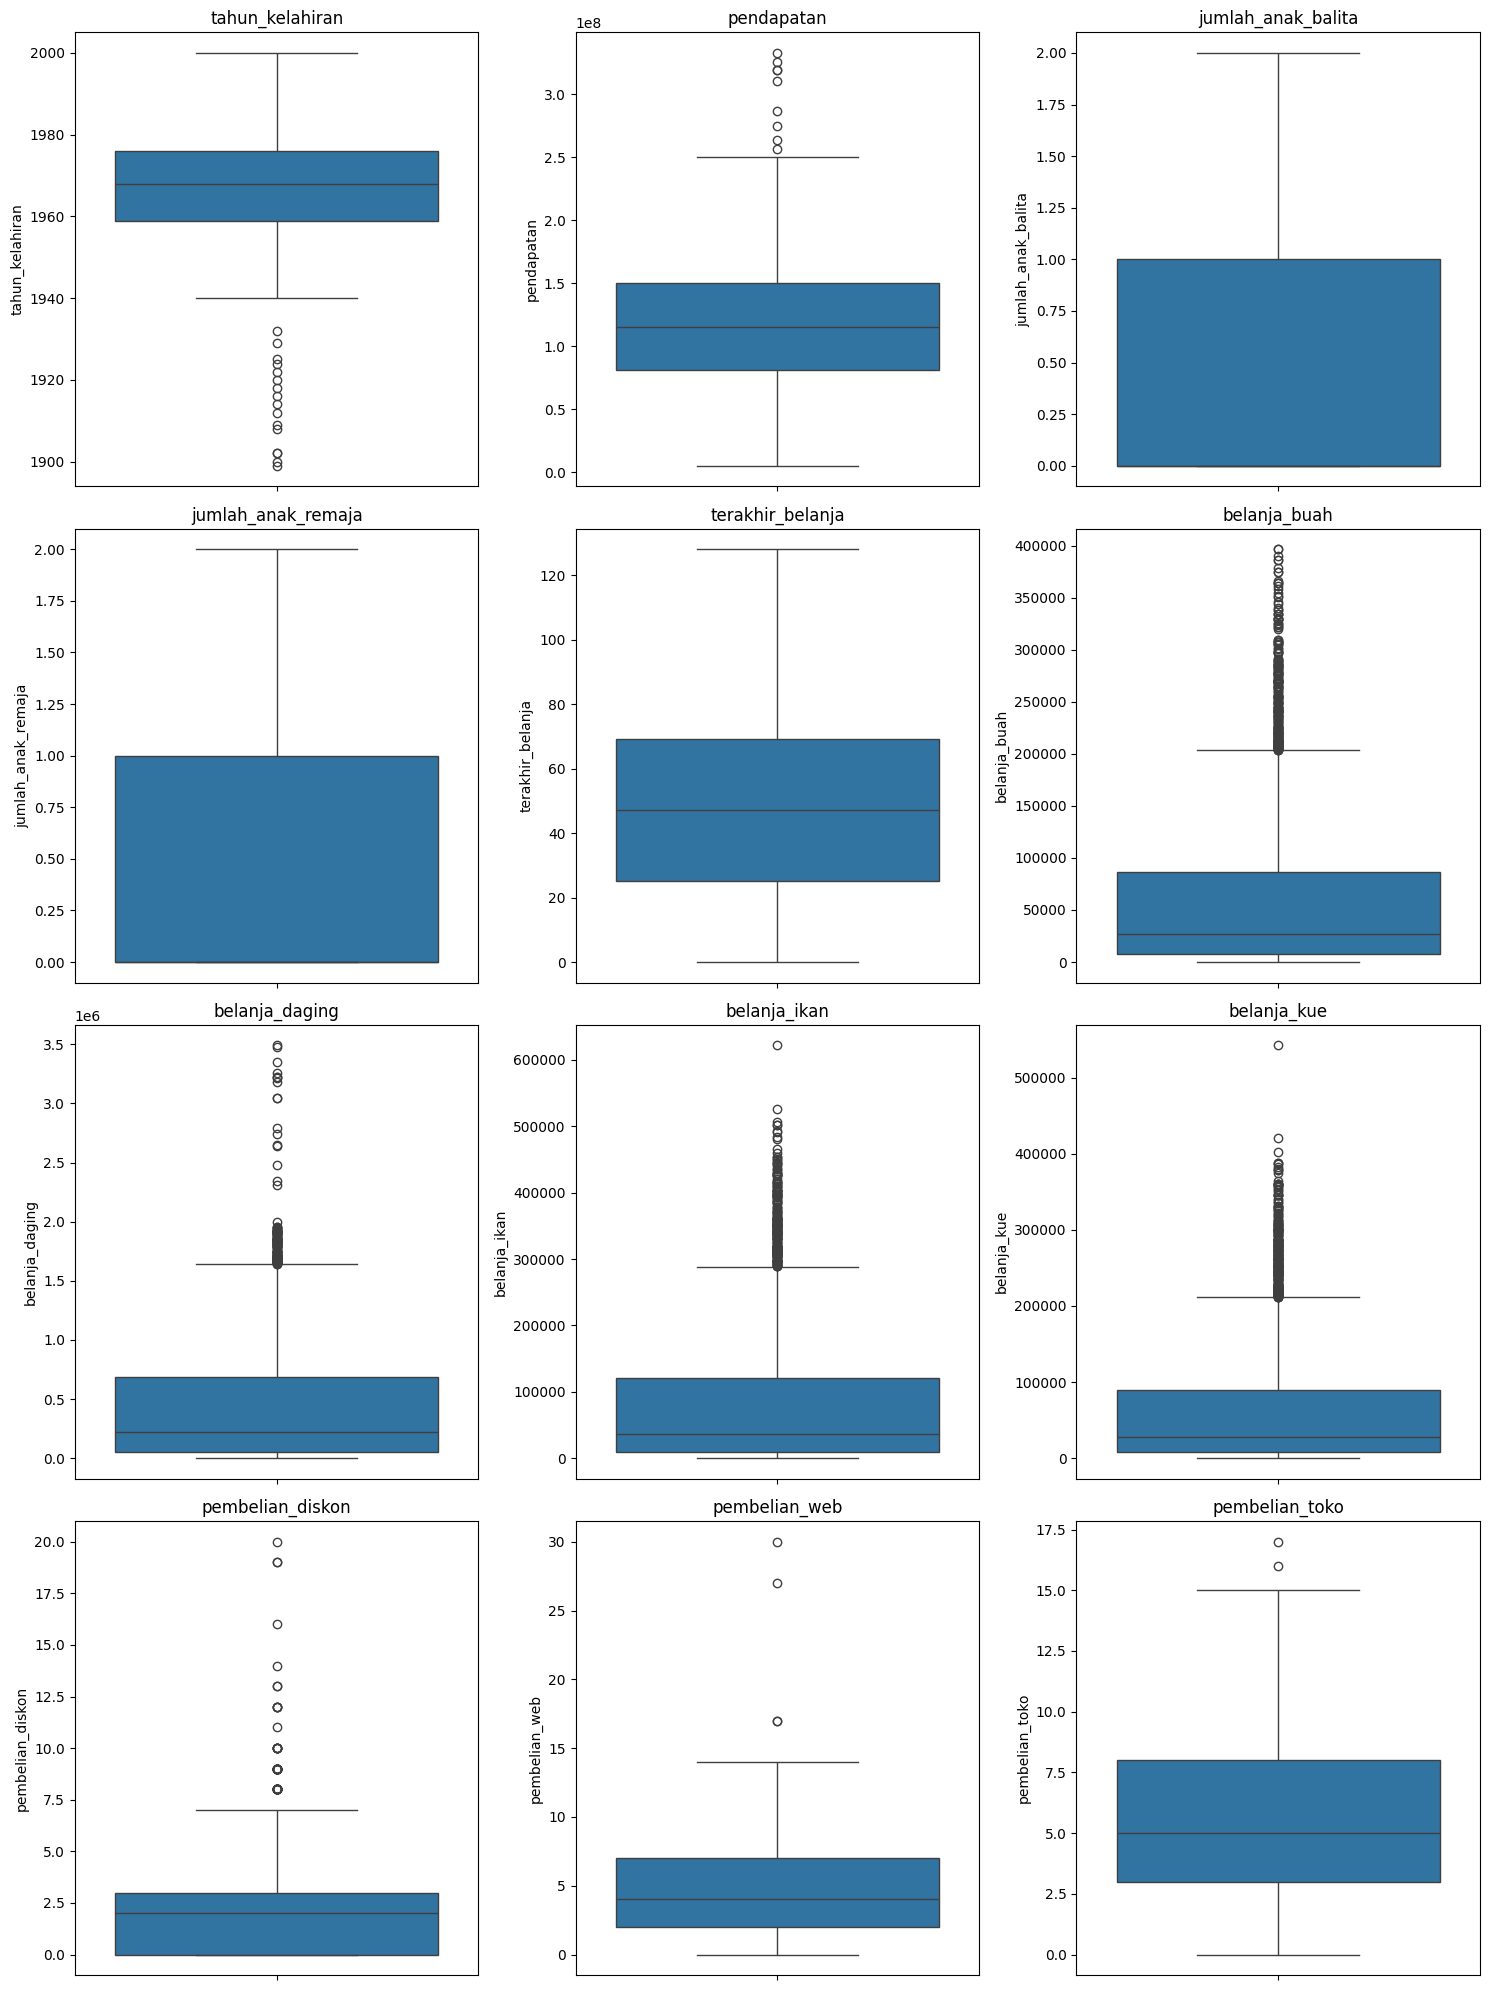

In [ ]:
# Tentukan jumlah kolom dan baris
num_plots = len(num_cols)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Pembagian bulat ke atas

# Buat subplot dengan layout yang diinginkan
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows*5))

# Ratakan array 2D menjadi 1D
axes = axes.flatten()

# Loop melalui kolom numerik dan subplotnya
for i, column in enumerate(num_cols):
    sns.boxplot(data=train_df[column], ax=axes[i])
    axes[i].set_title(column)

# Hapus subplot yang tidak digunakan
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Tampilkan plot
plt.tight_layout()
plt.show()

outlier paling banyak ada di:

* belanja_buah
* belanja_daging
* belanja_ikan
* belanja_kue



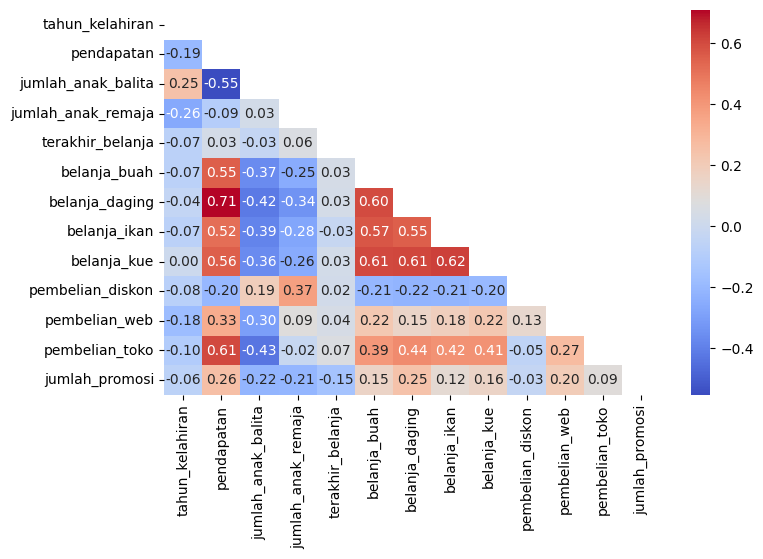

In [ ]:
# Lets plot the correlation matrix
train_df_num = train_df[num_cols].copy()
train_df_num['jumlah_promosi'] = train_df['jumlah_promosi']

# Ambil matriks korelasi dari data numerik
correlation_matrix = train_df_num.corr()

# Buat mask untuk setengah bagian diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation matrix dengan mask setengah diagonal
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.show()

# Data Prepocessing

## Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

def train_test_split_data(dataframe, test_size, random_state):
    x_train, x_test = train_test_split(dataframe, test_size=test_size, random_state=random_state)
    return x_train, x_test

# Contoh penggunaan:
train, test = train_test_split_data(dataframe=train_df, test_size=0.3, random_state=42)

In [ ]:
print(train.shape)
print(test.shape)

(2671, 17)
(1146, 17)


## Feat Engineering

Umur sekarang

In [ ]:
train['umur_sekarang'] = 2024 - train['tahun_kelahiran']
test['umur_sekarang'] = 2024 - test['tahun_kelahiran']
train_df['umur_sekarang'] = 2024 - train_df['tahun_kelahiran']
test_df['umur_sekarang'] = 2024 - train['tahun_kelahiran']

train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur_sekarang
1187,1963,Sarjana,Rencana Menikah,150717337.0,0.0,0.0,16.0,191797.0,1431983.0,264004.0,NaN,2.0,7.0,5.0,0.0,NaN,6,61
859,1969,Sarjana,Menikah,64002000.0,1.0,0.0,8.0,8092.0,10115.0,6069.0,8092.0,0.0,0.0,NaN,0.0,2014-03-21,1,55
533,1982,SMA,Menikah,115187439.0,NaN,0.0,55.0,57065.0,252126.0,66805.0,46336.0,5.0,6.0,4.0,0.0,NaN,2,42
3425,1960,Sarjana,Rencana Menikah,110773666.0,0.0,1.0,55.0,35149.0,264984.0,22618.0,1826.0,6.0,8.0,8.0,0.0,NaN,4,64
2760,1985,Sarjana,Sendiri,37698435.0,0.0,0.0,0.0,8470.0,5117.0,10934.0,441.0,0.0,0.0,2.0,0.0,NaN,3,39


Menambahkan jumlah pembelian

In [ ]:
train['jumlah_pembelian'] = train[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(0).sum(axis=1)
test['jumlah_pembelian'] = test[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(0).sum(axis=1)
train_df['jumlah_pembelian'] = train_df[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(0).sum(axis=1)
test_df['jumlah_pembelian'] = test_df[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(0).sum(axis=1)

train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur_sekarang,jumlah_pembelian
1187,1963,Sarjana,Rencana Menikah,150717337.0,0.0,0.0,16.0,191797.0,1431983.0,264004.0,NaN,2.0,7.0,5.0,0.0,NaN,6,61,1887784.0
859,1969,Sarjana,Menikah,64002000.0,1.0,0.0,8.0,8092.0,10115.0,6069.0,8092.0,0.0,0.0,NaN,0.0,2014-03-21,1,55,32368.0
533,1982,SMA,Menikah,115187439.0,NaN,0.0,55.0,57065.0,252126.0,66805.0,46336.0,5.0,6.0,4.0,0.0,NaN,2,42,422332.0
3425,1960,Sarjana,Rencana Menikah,110773666.0,0.0,1.0,55.0,35149.0,264984.0,22618.0,1826.0,6.0,8.0,8.0,0.0,NaN,4,64,324577.0
2760,1985,Sarjana,Sendiri,37698435.0,0.0,0.0,0.0,8470.0,5117.0,10934.0,441.0,0.0,0.0,2.0,0.0,NaN,3,39,24962.0


Jumlah anak

In [ ]:
train['jumlah_anak'] = train[['jumlah_anak_balita', 'jumlah_anak_remaja']].fillna(0).sum(axis=1)
test['jumlah_anak'] = test[['jumlah_anak_balita', 'jumlah_anak_remaja']].fillna(0).sum(axis=1)
train_df['jumlah_anak'] = train_df[['jumlah_anak_balita', 'jumlah_anak_remaja']].fillna(0).sum(axis=1)
test_df['jumlah_anak'] = test_df[['jumlah_anak_balita', 'jumlah_anak_remaja']].fillna(0).sum(axis=1)

train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur_sekarang,jumlah_pembelian,jumlah_anak
1187,1963,Sarjana,Rencana Menikah,150717337.0,0.0,0.0,16.0,191797.0,1431983.0,264004.0,NaN,2.0,7.0,5.0,0.0,NaN,6,61,1887784.0,0.0
859,1969,Sarjana,Menikah,64002000.0,1.0,0.0,8.0,8092.0,10115.0,6069.0,8092.0,0.0,0.0,NaN,0.0,2014-03-21,1,55,32368.0,1.0
533,1982,SMA,Menikah,115187439.0,NaN,0.0,55.0,57065.0,252126.0,66805.0,46336.0,5.0,6.0,4.0,0.0,NaN,2,42,422332.0,0.0
3425,1960,Sarjana,Rencana Menikah,110773666.0,0.0,1.0,55.0,35149.0,264984.0,22618.0,1826.0,6.0,8.0,8.0,0.0,NaN,4,64,324577.0,1.0
2760,1985,Sarjana,Sendiri,37698435.0,0.0,0.0,0.0,8470.0,5117.0,10934.0,441.0,0.0,0.0,2.0,0.0,NaN,3,39,24962.0,0.0


binning pendapatan

In [ ]:
train['bin_pendapatan'] = pd.qcut(train['pendapatan'], q=5, labels=False, precision=0)
test['bin_pendapatan'] = pd.qcut(test['pendapatan'], q=5, labels=False, precision=0)
train_df['bin_pendapatan'] = pd.qcut(train_df['pendapatan'], q=5, labels=False, precision=0)
test_df['bin_pendapatan'] = pd.qcut(train_df['pendapatan'], q=5, labels=False, precision=0)

train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,...,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur_sekarang,jumlah_pembelian,jumlah_anak,bin_pendapatan
1187,1963,Sarjana,Rencana Menikah,150717337.0,0.0,0.0,16.0,191797.0,1431983.0,264004.0,...,2.0,7.0,5.0,0.0,NaN,6,61,1887784.0,0.0,3.0
859,1969,Sarjana,Menikah,64002000.0,1.0,0.0,8.0,8092.0,10115.0,6069.0,...,0.0,0.0,NaN,0.0,2014-03-21,1,55,32368.0,1.0,0.0
533,1982,SMA,Menikah,115187439.0,NaN,0.0,55.0,57065.0,252126.0,66805.0,...,5.0,6.0,4.0,0.0,NaN,2,42,422332.0,0.0,2.0
3425,1960,Sarjana,Rencana Menikah,110773666.0,0.0,1.0,55.0,35149.0,264984.0,22618.0,...,6.0,8.0,8.0,0.0,NaN,4,64,324577.0,1.0,2.0
2760,1985,Sarjana,Sendiri,37698435.0,0.0,0.0,0.0,8470.0,5117.0,10934.0,...,0.0,0.0,2.0,0.0,NaN,3,39,24962.0,0.0,0.0


## Handling Outlier

## Data Pipeline - Handling MissVal

In [ ]:
cat_cols_pipe = ['pendidikan', 'status_pernikahan']
bin_cols_pipe = ['keluhan']
num_cols_pipe = ['umur_sekarang', 'pendapatan', 'bin_pendapatan', 'jumlah_anak_balita',
            'jumlah_anak_remaja', 'jumlah_pembelian', 'terakhir_belanja', 'belanja_buah',
            'belanja_daging', 'belanja_ikan', 'belanja_kue',
            'pembelian_diskon', 'pembelian_web', 'pembelian_toko']
target_col = ['jumlah_promosi']

In [ ]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numericNotScaled_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, cat_cols_pipe),
        ('binary', binary_pipeline, bin_cols_pipe),
        ('num', numeric_pipeline, num_cols_pipe),
        # ('numNS', numericNotScaled_pipeline, numNS_cols),
        ('drop_col', 'drop', "tanggal_menjadi_anggota")
        # ('pass', 'passthrough', pass_cols)
    ],
    remainder='passthrough'
)

In [ ]:
X_train = train.drop(columns = "jumlah_promosi")
y_train = train["jumlah_promosi"]
X_test = test.drop(columns = "jumlah_promosi")
y_test = test["jumlah_promosi"]

## Column Transfomers

In [ ]:
preprocessed_X_train = preprocessor.fit_transform(X_train)
preprocessed_X_train = pd.DataFrame(preprocessed_X_train, columns = [x for x in preprocessor.get_feature_names_out()])

# Model Training

In [ ]:
preprocessed_x_test = preprocessor.transform(X_test)
test_df_preprocessed = preprocessor.transform(test_df)

## 1. XGBoost Dasar

Accuracy: [0.693717277486911]
F1-Score: [0.6909825303219769]
Precision: [0.7038525489822435]
Recall: [0.6848185214135654]
-------------------------------
Classification Report
-------------------------------
              precision    recall  f1-score   support

           0      0.613     0.731     0.667       294
           1      0.434     0.333     0.377       159
           2      0.713     0.621     0.664       116
           3      0.785     0.772     0.779       123
           4      0.846     0.867     0.856       165
           5      0.773     0.843     0.807       166
           6      0.762     0.626     0.688       123

    accuracy                          0.694      1146
   macro avg      0.704     0.685     0.691      1146
weighted avg      0.690     0.694     0.688      1146

Confusion_Matrix


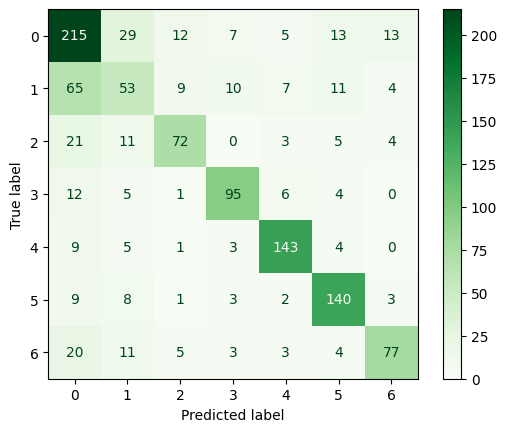

In [ ]:
# Define the model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(preprocessed_X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(preprocessed_x_test)

# Calculate evaluation metrics
accuracy_scores = [accuracy_score(y_test, y_pred_xgb)]
f1_scores = [f1_score(y_test, y_pred_xgb, average='macro')]
precision_scores = [precision_score(y_test, y_pred_xgb, average='macro')]
recall_scores = [recall_score(y_test, y_pred_xgb, average='macro')]

# Print the Results
print(f"Accuracy: {accuracy_scores}")
print(f"F1-Score: {f1_scores}")
print(f"Precision: {precision_scores}")
print(f"Recall: {recall_scores}")

print("-------------------------------")
print("Classification Report")
print("-------------------------------")
print(classification_report(y_test, y_pred_xgb, digits=3))

print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb,cmap="Greens")
plt.show()

In [ ]:
xgb_model.fit(preprocessor.fit_transform(train_df.drop(columns='jumlah_promosi')), train_df['jumlah_promosi'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
df_submisi = test_df[["ID"]].copy()

In [ ]:
df_submisi['jumlah_promosi'] = xgb_model.predict(test_df_preprocessed)
df_submisi.to_csv('submisi_tipistipis_modeldasar_featengUmurBinPendapatanJumlahPembelian_hilang5.csv', index=False)

In [ ]:
df_submisi.jumlah_promosi.value_counts()

jumlah_promosi
0    1208
5     580
4     507
3     443
1     422
6     364
2     294
Name: count, dtype: int64

## 2. Ensemble Dasar

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: [0.6073298429319371]
F1-Score: [0.5843444738581093]
Precision: [0.7537931784106701]
Recall: [0.5512395562082099]
-------------------------------
Classification Report
-------------------------------
              precision    recall  f1-score   support

           0      0.419     0.912     0.574       294
           1      0.519     0.088     0.151       159
           2      0.867     0.336     0.484       116
           3      0.885     0.561     0.687       123
           4      0.873     0.794     0.832       165
           5      0.829     0.729     0.776       166
           6      0.885     0.439     0.587       123

    accuracy                          0.607      1146
   macro avg      0.754     0.551     0.584      1146
weighted avg      0.703     0.607     0.586      1146

Confusion_Matrix


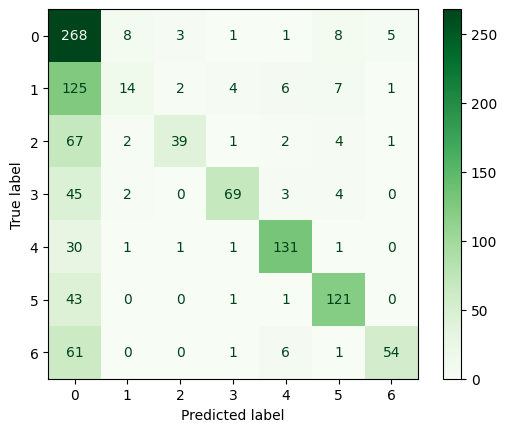

In [ ]:
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm_classifier = SVC()

ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting),
    ('svm', svm_classifier)
], voting='hard')

# Train the ensemble classifier
ensemble_classifier.fit(preprocessed_X_train, y_train)

# Predict on the test set
y_pred_ensemble = ensemble_classifier.predict(preprocessed_x_test)

# Calculate evaluation metrics
accuracy_scores = [accuracy_score(y_test, y_pred_ensemble)]
f1_scores = [f1_score(y_test, y_pred_ensemble, average='macro')]
precision_scores = [precision_score(y_test, y_pred_ensemble, average='macro')]
recall_scores = [recall_score(y_test, y_pred_ensemble, average='macro')]

# Print the Results
print(f"Accuracy: {accuracy_scores}")
print(f"F1-Score: {f1_scores}")
print(f"Precision: {precision_scores}")
print(f"Recall: {recall_scores}")

print("-------------------------------")
print("Classification Report")
print("-------------------------------")
print(classification_report(y_test, y_pred_ensemble, digits=3))

print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ensemble,cmap="Greens")
plt.show()

In [ ]:
gradient_boosting.fit(preprocessor.fit_transform(train_df.drop(columns='churn')), train_df['churn'])

## Submisi

In [ ]:
df_submisi = test_df[["ID"]].copy()

In [ ]:
test_df_preprocessed = preprocessor.transform(test_df)
df_submisi['churn'] = gbc.predict(test_df_preprocessed)